<a href="https://colab.research.google.com/github/HayaRedFox/DS_intro/blob/main/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # перевод в нижний регистр
    text = re.sub(r'[^a-z ]', '', text) # только буквы и пробелы
    tokens = nltk.word_tokenize(text)
    tokens = [lemm.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
print(clean_text("I loved this movie!!! It was amazing and funny :)"))

loved movie amazing funny


In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv"
data = pd.read_csv(url)

# Переименовываем колонки
data = data.rename(columns={'review': 'text', 'sentiment': 'label'})

# Приводим метки в числовой формат
data['label'] = data['label'].map({'positive': 1, 'negative': 0})

# Берём небольшой сбалансированный сэмпл
data = data.sample(5000, random_state=42)

# Чистим текст
data['clean'] = data['text'].apply(clean_text)

data.head()

,text,label,clean
33553,I really liked this Summerslam due to the look...,1,really liked summerslam due look arena curtain...
9427,Not many television shows appeal to quite as m...,1,many television show appeal quite many differe...
199,The film quickly gets to a major chase scene w...,0,film quickly get major chase scene ever increa...
12447,Jane Austen would definitely approve of this o...,1,jane austen would definitely approve onebr br ...
39489,Expectations were somewhat high for me when I ...,0,expectation somewhat high went see movie thoug...


In [22]:
print("До:", data['text'].iloc[2])
print("После:", data['clean'].iloc[2])

До: The film quickly gets to a major chase scene with ever increasing destruction. The first really bad thing is the guy hijacking Steven Seagal would have been beaten to pulp by Seagal's driving, but that probably would have ended the whole premise for the movie.<br /><br />It seems like they decided to make all kinds of changes in the movie plot, so just plan to enjoy the action, and do not expect a coherent plot. Turn any sense of logic you may have, it will reduce your chance of getting a headache.<br /><br />I does give me some hope that Steven Seagal is trying to move back towards the type of characters he portrayed in his more popular movies.
После: film quickly get major chase scene ever increasing destruction first really bad thing guy hijacking steven seagal would beaten pulp seagals driving probably would ended whole premise moviebr br seems like decided make kind change movie plot plan enjoy action expect coherent plot turn sense logic may reduce chance getting headachebr b

In [23]:
bow = CountVectorizer(max_features=3000)
X_bow = bow.fit_transform(data['clean'])
y = data['label']

In [24]:
print("Размерность:", X_bow.shape)

Размерность: (5000, 3000)


In [25]:
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow.get_feature_names_out())
bow_df.head(10)

,abandoned,ability,able,absolute,absolutely,absurd,abuse,academy,accent,accept,...,york,youd,youll,young,younger,youre,youth,youve,zero,zombie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(data['clean'])

In [27]:

print("Размерность TF-IDF:", X_tfidf.shape)

Размерность TF-IDF: (5000, 3000)


              precision    recall  f1-score   support

           0       0.87      0.80      0.83       506
           1       0.81      0.87      0.84       494

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



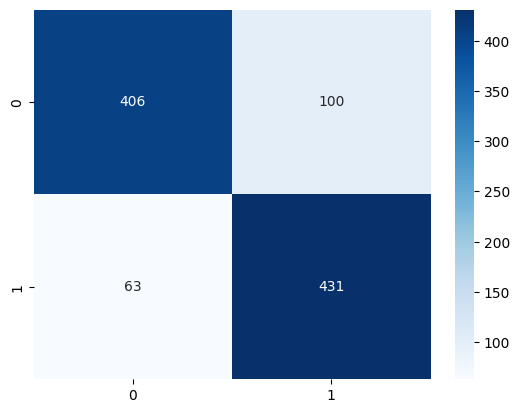

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['clean'])
X_seq = tokenizer.texts_to_sequences(data['clean'])
X_pad = pad_sequences(X_seq, maxlen=70, padding='post')

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model_lstm = Sequential([
    Embedding(20000, 64, input_length=50),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
history = model_lstm.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.5126 - loss: 0.6927 - val_accuracy: 0.5537 - val_loss: 0.6880
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.6745 - loss: 0.6324 - val_accuracy: 0.8062 - val_loss: 0.4915
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.8784 - loss: 0.3378 - val_accuracy: 0.8225 - val_loss: 0.4373
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.9536 - loss: 0.1655 - val_accuracy: 0.8075 - val_loss: 0.4658
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9853 - loss: 0.0639 - val_accuracy: 0.8000 - val_loss: 0.6611


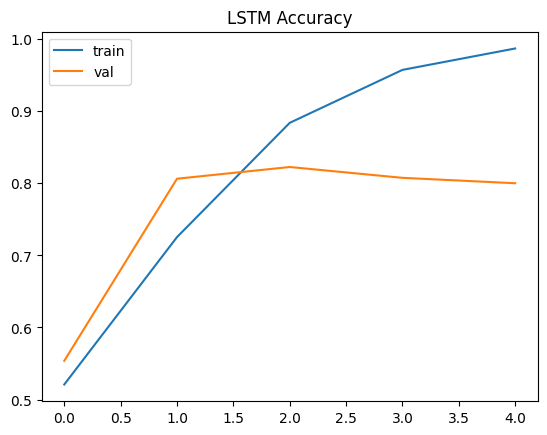

In [67]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.title("LSTM Accuracy")
plt.show()

In [70]:
samples = [
    "I absolutely loved this movie, it was great!",
    "This was terrible, I hated every moment",
    "Not bad, but could be better",
    "Amazing story and acting!"
]

for s in samples:
    seq = tokenizer.texts_to_sequences([s])
    pad = pad_sequences(seq, maxlen= 60, padding='post')
    pred = model_lstm.predict(pad)[0][0]
    label = "😊 Positive" if pred > 0.5 else "😠 Negative"
    print(f"{s:50s} → {label} ({pred:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
I absolutely loved this movie, it was great!       → 😊 Positive (1.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
This was terrible, I hated every moment            → 😠 Negative (0.35)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Not bad, but could be better                       → 😠 Negative (0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Amazing story and acting!                          → 😊 Positive (1.00)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


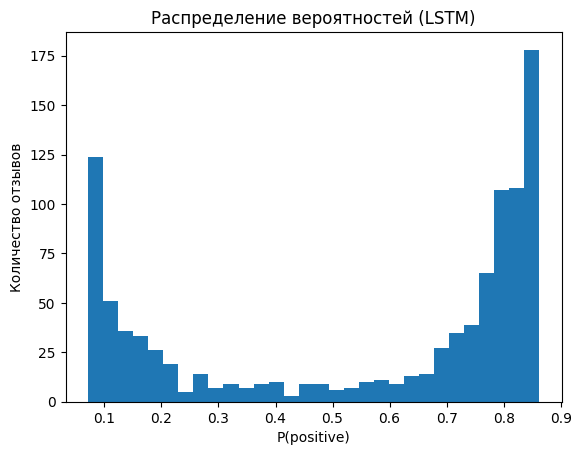

In [34]:
preds = model_lstm.predict(X_test[:1000])
plt.hist(preds, bins=30)
plt.title("Распределение вероятностей (LSTM)")
plt.xlabel("P(positive)")
plt.ylabel("Количество отзывов")
plt.show()